# **Intel Image Classification Challenge**

This challenge has images belonging to 6 classes namely Mountain, Street, Glaciers, Buildings, Sea and Forest. Our goal here is to build a model that detects the class of the given image. 
Two deep learning models have been trained in this notebook. One model is a CNN and the other one is a CNN model that uses transfer learning.

In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

# **Loading the Data**
Loading the data from the folders into a list with the specifications needed.

In [3]:
def load_data():
    datasets = ['../input/intel-image-classification/seg_train/seg_train', '../input/intel-image-classification/seg_test/seg_test']
    output = []
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                img_path = os.path.join(os.path.join(dataset, folder), file)
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)
                images.append(image)
                labels.append(label)
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
        output.append((images, labels))
    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  1%|▏         | 35/2404 [00:00<00:06, 344.29it/s]

Loading ../input/intel-image-classification/seg_train/seg_train


  8%|▊         | 47/553 [00:00<00:01, 460.46it/s]

Loading ../input/intel-image-classification/seg_test/seg_test


100%|██████████| 437/437 [00:00<00:00, 491.02it/s]


# **Normalizing the Data**
Normalizing the data ensures that the pixel values are between 0 and 1 for every pixel in the images.

In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

train_images = train_images / 255.0 
test_images = test_images / 255.0

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)


# **Data Visualization**

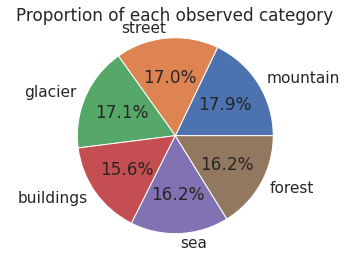

In [6]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)

plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

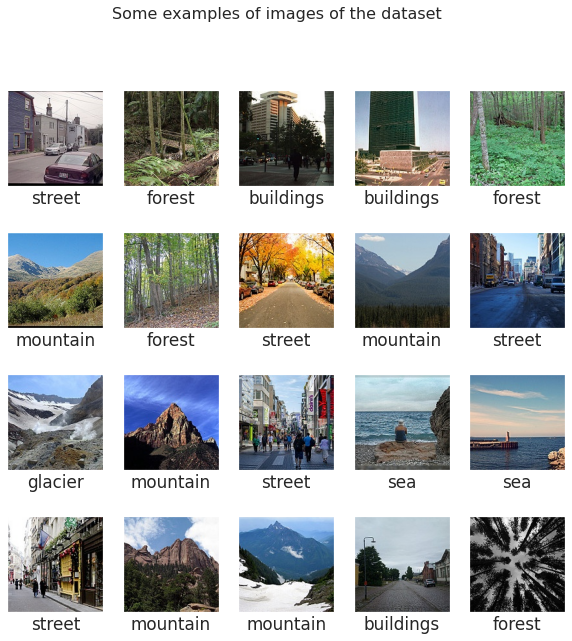

In [7]:
def display_examples(class_names, images, labels):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()
    
display_examples(class_names, train_images, train_labels)

# **CNN Model**
This model has 3 convolution layers followed by 2 dense layers. The model has approx 76k parameters and gives an accuracy of about 71% on training.

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(8, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(4, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 4)         292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 4)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1156)              0

In [9]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=5, validation_split = 0.2)

Epoch 1/5
88/88 [==============================] - 5s 51ms/step - loss: 1.3280 - accuracy: 0.4566 - val_loss: 1.1004 - val_accuracy: 0.5743
Epoch 2/5
88/88 [==============================] - 4s 42ms/step - loss: 1.0049 - accuracy: 0.6111 - val_loss: 0.9770 - val_accuracy: 0.6220
Epoch 3/5
88/88 [==============================] - 4s 41ms/step - loss: 0.9390 - accuracy: 0.6397 - val_loss: 0.9449 - val_accuracy: 0.6234
Epoch 4/5
88/88 [==============================] - 3s 39ms/step - loss: 0.8407 - accuracy: 0.6789 - val_loss: 0.8644 - val_accuracy: 0.6391
Epoch 5/5
88/88 [==============================] - 4s 42ms/step - loss: 0.7685 - accuracy: 0.7106 - val_loss: 0.7761 - val_accuracy: 0.7129


In [10]:
model.save_weights("model1.hdf5")

# **CNN Model using VGG16 Transfer Learning**
This model uses the base of an already trained model VGG 16, the last few layers of the model are retrained in order to make the model suitable to detect classes in our problem dataset. This model gives us an accuracy in the range of 85%

In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers

pretrained_model=VGG16(input_shape = (150, 150, 3), 
                        include_top = False, 
                        weights = 'imagenet')

In [9]:
for layer in pretrained_model.layers:
     layer.trainable = False

# pretrained_model.summary()
last_layer = pretrained_model.get_layer('block5_pool')
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output= last_layer.output

last layer of vgg : output shape:  (None, 4, 4, 512)


In [10]:
x = layers.Conv2D(256, 3, activation='relu', padding="same",)(last_output)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128, 3, activation='relu', padding="same",)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x) 

x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x) 

x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.1)(x)

x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.05)(x)

x = layers.Dense(6, activation='softmax')(x)           

model_vgg = Model(pretrained_model.input, x) 


model_vgg.compile(optimizer = RMSprop(lr=0.001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

model_vgg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [11]:
history = model_vgg.fit(train_images, train_labels, batch_size=128, epochs=5, validation_split = 0.2)

Epoch 1/5
88/88 [==============================] - 20s 233ms/step - loss: 1.0254 - acc: 0.5815 - val_loss: 1.0034 - val_acc: 0.6801
Epoch 2/5
88/88 [==============================] - 17s 196ms/step - loss: 0.5250 - acc: 0.8203 - val_loss: 0.5146 - val_acc: 0.8329
Epoch 3/5
88/88 [==============================] - 17s 197ms/step - loss: 0.4242 - acc: 0.8577 - val_loss: 0.4363 - val_acc: 0.8660
Epoch 4/5
88/88 [==============================] - 17s 197ms/step - loss: 0.3584 - acc: 0.8790 - val_loss: 0.4391 - val_acc: 0.8600
Epoch 5/5
88/88 [==============================] - 17s 195ms/step - loss: 0.3101 - acc: 0.8979 - val_loss: 0.5693 - val_acc: 0.8304


In [12]:
model_vgg.save_weights("model_vgg.hdf5")